<a href="https://colab.research.google.com/github/yuvalkabeli/GoogleColabProjects/blob/main/Supervised_Learning_on_Iris_Data_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [ ]:
from sklearn.datasets import load_iris
iris= load_iris()
X, y = iris.data, iris.target
extra_feature1 = X[:,3]*X[:,3]
extra_feature2 = X[:,2]*X[:,3]
data = np.hstack([X,extra_feature1.reshape(-1,1),extra_feature2.reshape(-1,1),y.reshape(-1, 1)])
columns = iris.feature_names + ["sepal/petal length (cm)"]+ ["sepal length/width (cm)"]+['species']
df = pd.DataFrame(data, columns=columns)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal/petal length (cm),sepal length/width (cm),species
0,5.1,3.5,1.4,0.2,0.04,0.28,0.0
1,4.9,3.0,1.4,0.2,0.04,0.28,0.0
2,4.7,3.2,1.3,0.2,0.04,0.26,0.0
3,4.6,3.1,1.5,0.2,0.04,0.30,0.0
4,5.0,3.6,1.4,0.2,0.04,0.28,0.0


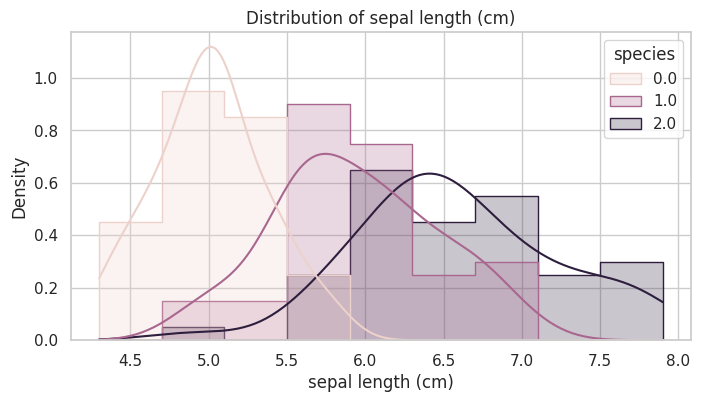

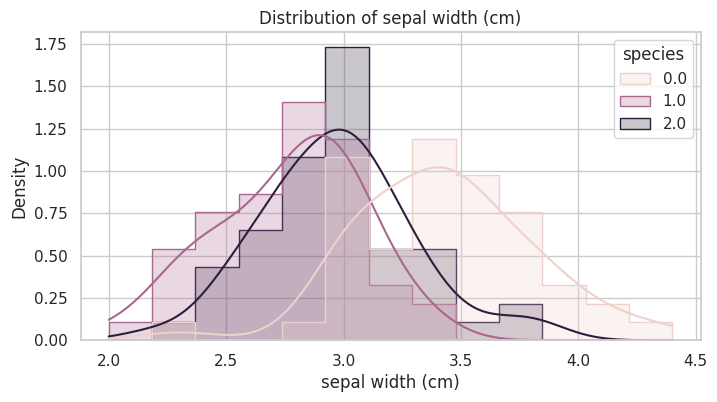

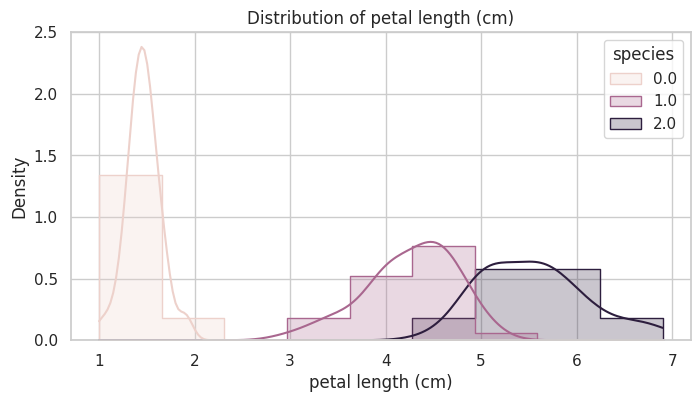

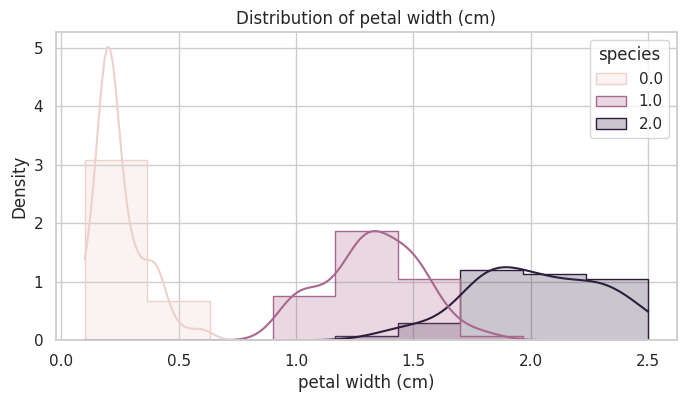

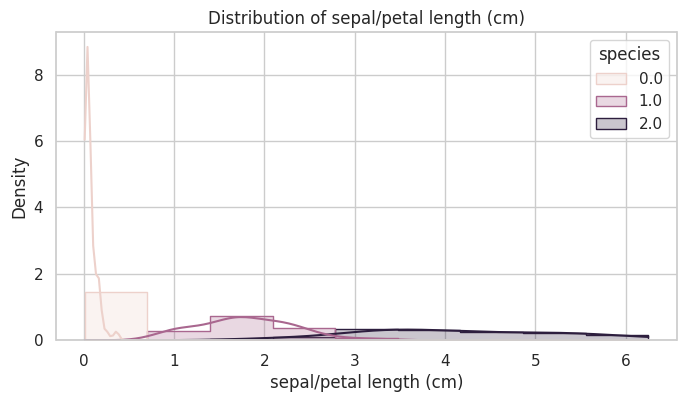

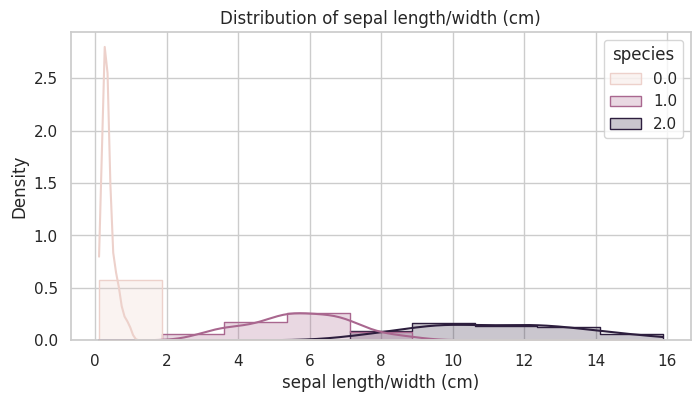

In [ ]:
sns.set(style="whitegrid")

# Create histograms for numerical features
features = df.columns[:-1]  # Excluding the 'species' column for numerical features
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, kde=True, hue="species", element="step", stat="density", common_norm=False)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

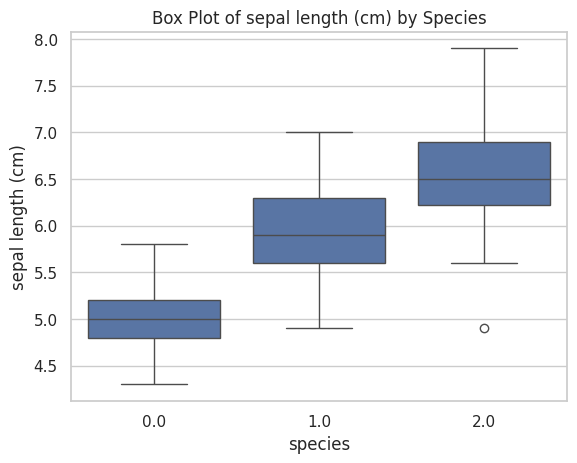

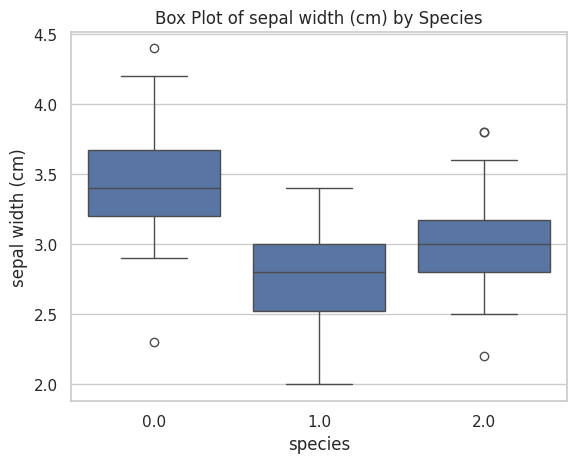

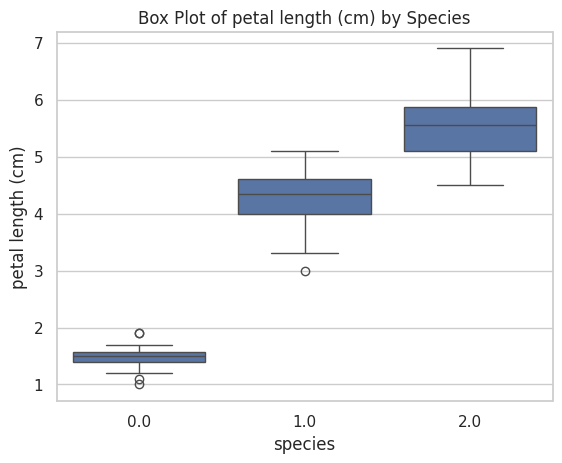

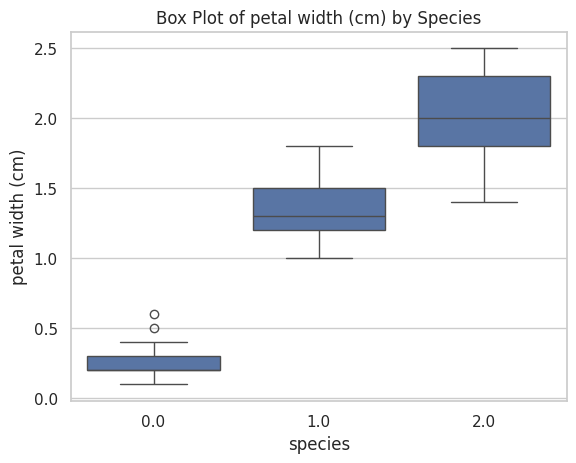

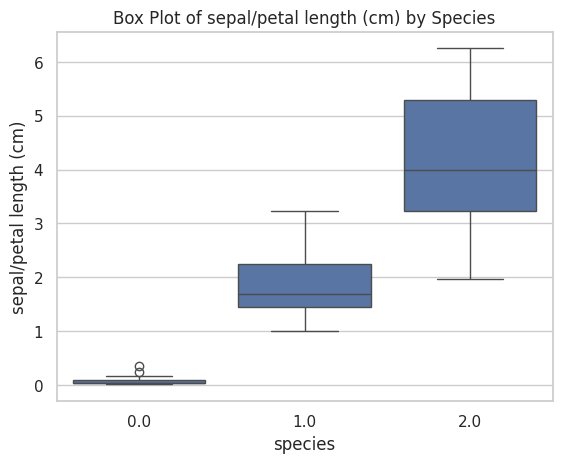

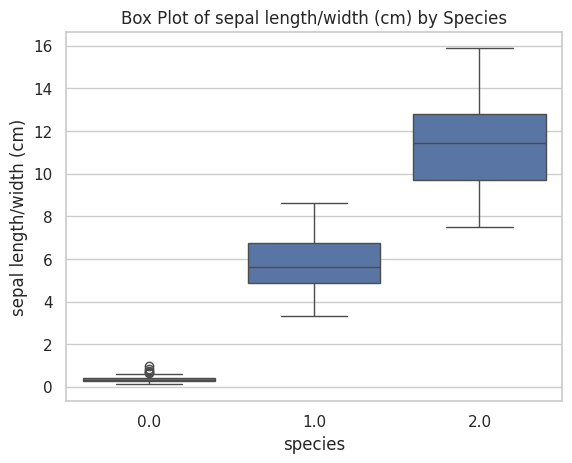

In [ ]:
features = df.columns[:-1]  # Excludes the 'species' column

# Loop through the features to create separate box plots for each
for feature in features:
    # plt.figure(figsize=(8, 5))  # Set the figure size for better readability
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Species')
    plt.show()

#Data Proccessing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score


In [ ]:
train, test = np.split(df.sample(frac=1), [int(0.7*len(df))])

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X,y)


  return X, y

In [ ]:
X_train, y_train= scale_dataset(train,True)
X_test, y_test= scale_dataset(test,False)

In [ ]:
def print_stats(model):
  y_pred = model.predict(X_test)
  conf_matrix = confusion_matrix(y_test, y_pred)


  scores = cross_val_score(model, X_test, y_test, cv=5)  # Assuming X and y are your features and labels
  print("Confusion Matrix:")
  print(conf_matrix)
  print("Classification Report:")
  print(classification_report(y_test, y_pred))
  print("Cross-validation scores:", scores)
  print("Average score:", scores.mean())

#Log Reg

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
print_stats(lg_model)

Confusion Matrix:
[[12  0  0]
 [ 0 16  0]
 [ 0  2 15]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       0.89      1.00      0.94        16
         2.0       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Cross-validation scores: [1.         1.         0.77777778 1.         1.        ]
Average score: 0.9555555555555555


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model = knn_model.fit(X_train, y_train)

In [ ]:
print_stats(knn_model)

Confusion Matrix:
[[12  0  0]
 [ 0 16  0]
 [ 0  2 15]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       0.89      1.00      0.94        16
         2.0       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Cross-validation scores: [0.88888889 1.         0.88888889 1.         1.        ]
Average score: 0.9555555555555555


#SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
print_stats(svm_model)

Confusion Matrix:
[[12  0  0]
 [ 0 16  0]
 [ 0  2 15]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       0.89      1.00      0.94        16
         2.0       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Cross-validation scores: [1.         1.         0.77777778 1.         1.        ]
Average score: 0.9555555555555555
